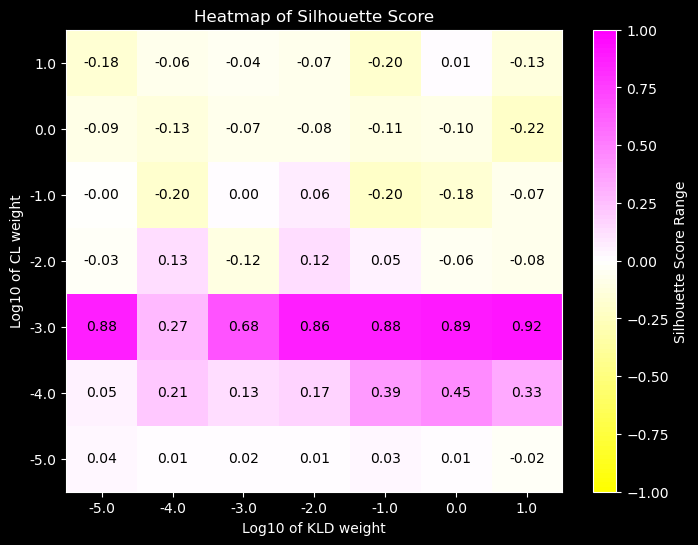

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = [
    (1.0, 1.0, 0.0),  # Yellow
    (1.0, 1.0, 1.0),  # White
    (1.0, 0.0, 1.0)   # Purple
]
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_colormap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Generate sample data for demonstration purposes
# Assuming you have two hyperparameters: param1 and param2

# Example grid ranges (logarithmically spaced)
param1 = np.logspace(-5, 1, num=7)  # 7 values from 1e-5 to 10
param2 = np.logspace(-5, 1, num=7)  # 7 values from 1e-5 to 10

# Create a grid of scores (for demonstration, we use random values between -1 and 1)
scores = [[0.0369,0.0100,0.0198,0.0062,0.0256,0.0062,-0.0219],#cl_weight = 1e-5
          [0.0540,0.2105,0.1293,0.1713,0.3880,0.4494,0.3265],#cl_weight = 1e-4
          [0.8796,0.2740,0.6779,0.8613,0.8789,0.8909,0.9195],#cl_weight = 1e-3
          [-0.0285,0.1285,-0.1159,0.1236,0.0544,-0.0581,-0.0788],#cl_weight = 1e-2
          [-0.0005,-0.1955,0.0041,0.0603,-0.2041,-0.1794,-0.0745],#cl_weight = 1e-1
          [-0.0918,-0.1348,-0.0712,-0.0792,-0.1095,-0.0993,-0.2198],#cl_weight = 1
          [-0.1786,-0.0616,-0.0433,-0.0704,-0.1994,0.0116,-0.1314]]#cl_weight = 10
        # kld_weight = 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10

# Convert hyperparameter values to their log10 values for plotting
log_param1 = np.log10(param1)
log_param2 = np.log10(param2)

plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['savefig.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

# Create a heatmap plot
plt.figure(figsize=(8, 6))
plt.imshow(scores, aspect='auto', cmap=custom_cmap, origin='lower',
           extent=[log_param1.min() - (log_param1[1] - log_param1[0])/2, log_param1.max() + (log_param1[1] - log_param1[0])/2,
                   log_param2.min() - (log_param2[1] - log_param2[0])/2, log_param2.max() + (log_param2[1] - log_param2[0])/2],
                   vmin=-1, vmax=1)

# Adding color bar
cbar = plt.colorbar()
cbar.set_label('Silhouette Score Range')

# Label the axes with the log values
plt.xticks(ticks=log_param1, labels=np.round(log_param1, 2))
plt.yticks(ticks=log_param2, labels=np.round(log_param2, 2))

plt.xlabel('Log10 of KLD weight')
plt.ylabel('Log10 of CL weight')
plt.title('Heatmap of Silhouette Score')

for i in range(len(log_param1)):
    for j in range(len(log_param2)):
        plt.text(log_param1[i], log_param2[j], f'{scores[j][i]:.2f}', 
                 ha='center', va='center', color='black')

plt.show()
